In [1]:
import sys
sys.path.append('../src/')
from xpcs import *
from sims import *

import scipy.fftpack as sfft

%matplotlib notebook

<IPython.core.display.Javascript object>


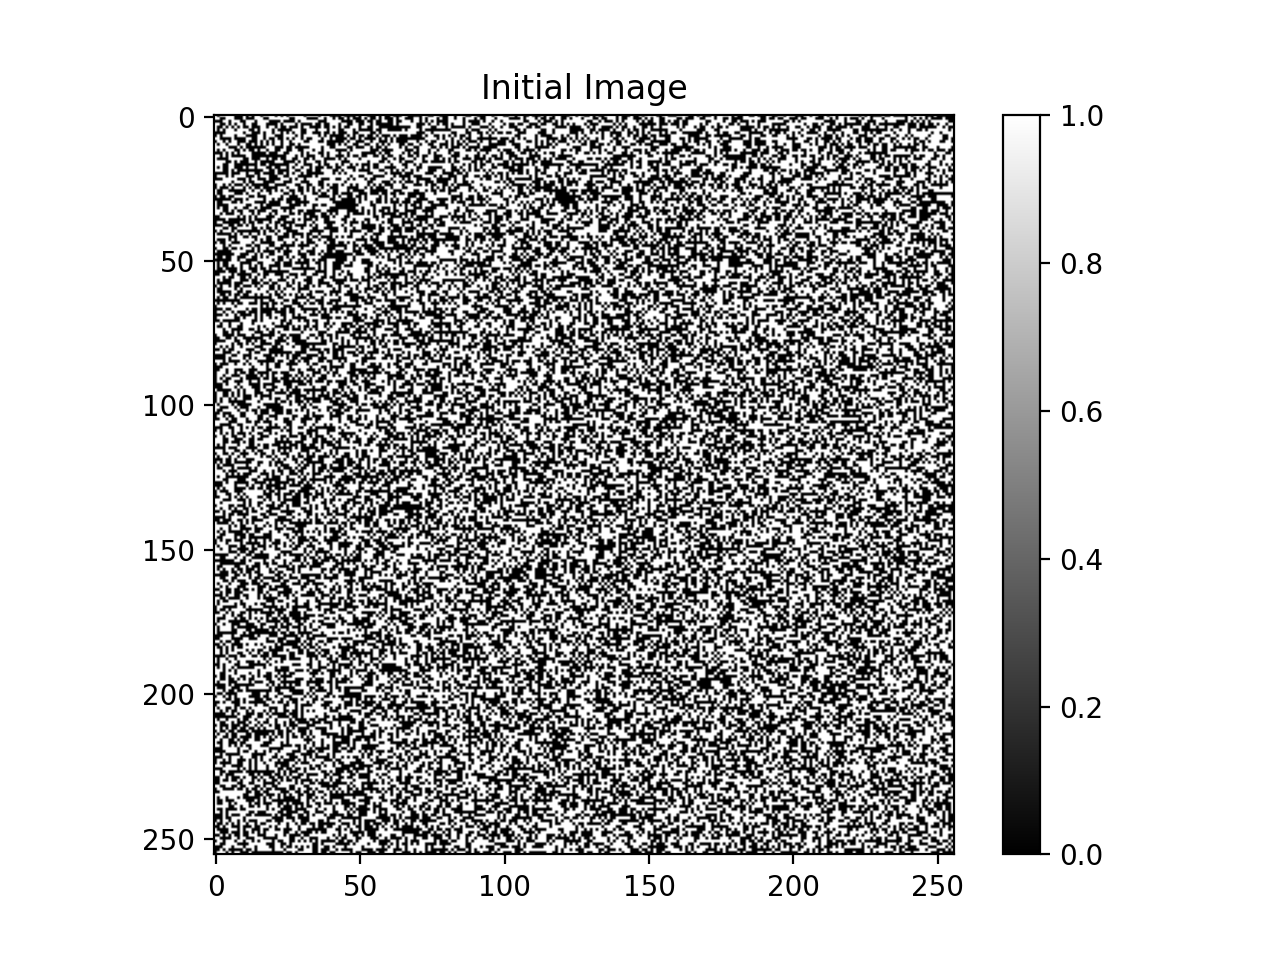

<IPython.core.display.Javascript object>


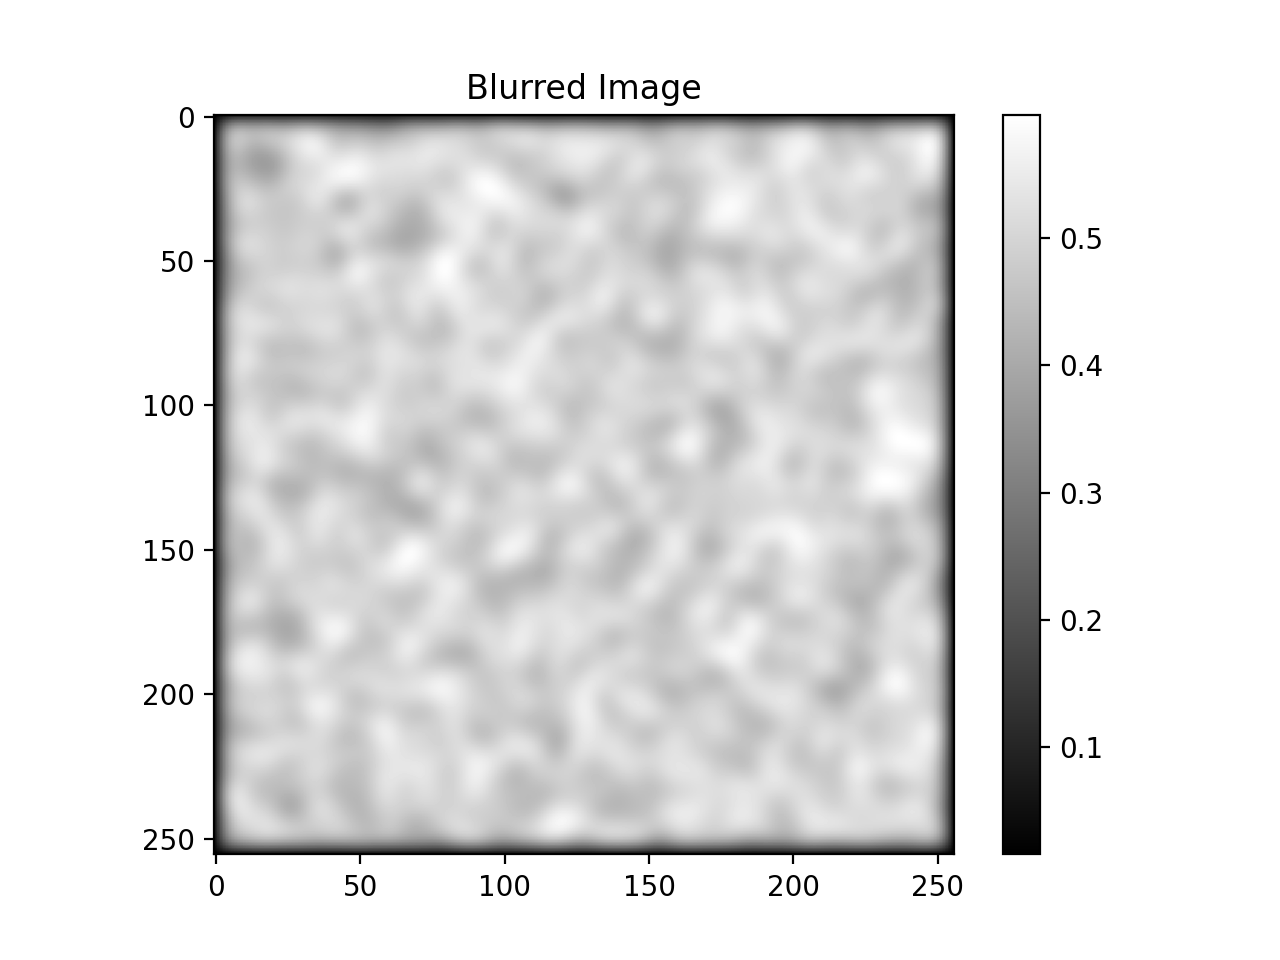

<IPython.core.display.Javascript object>


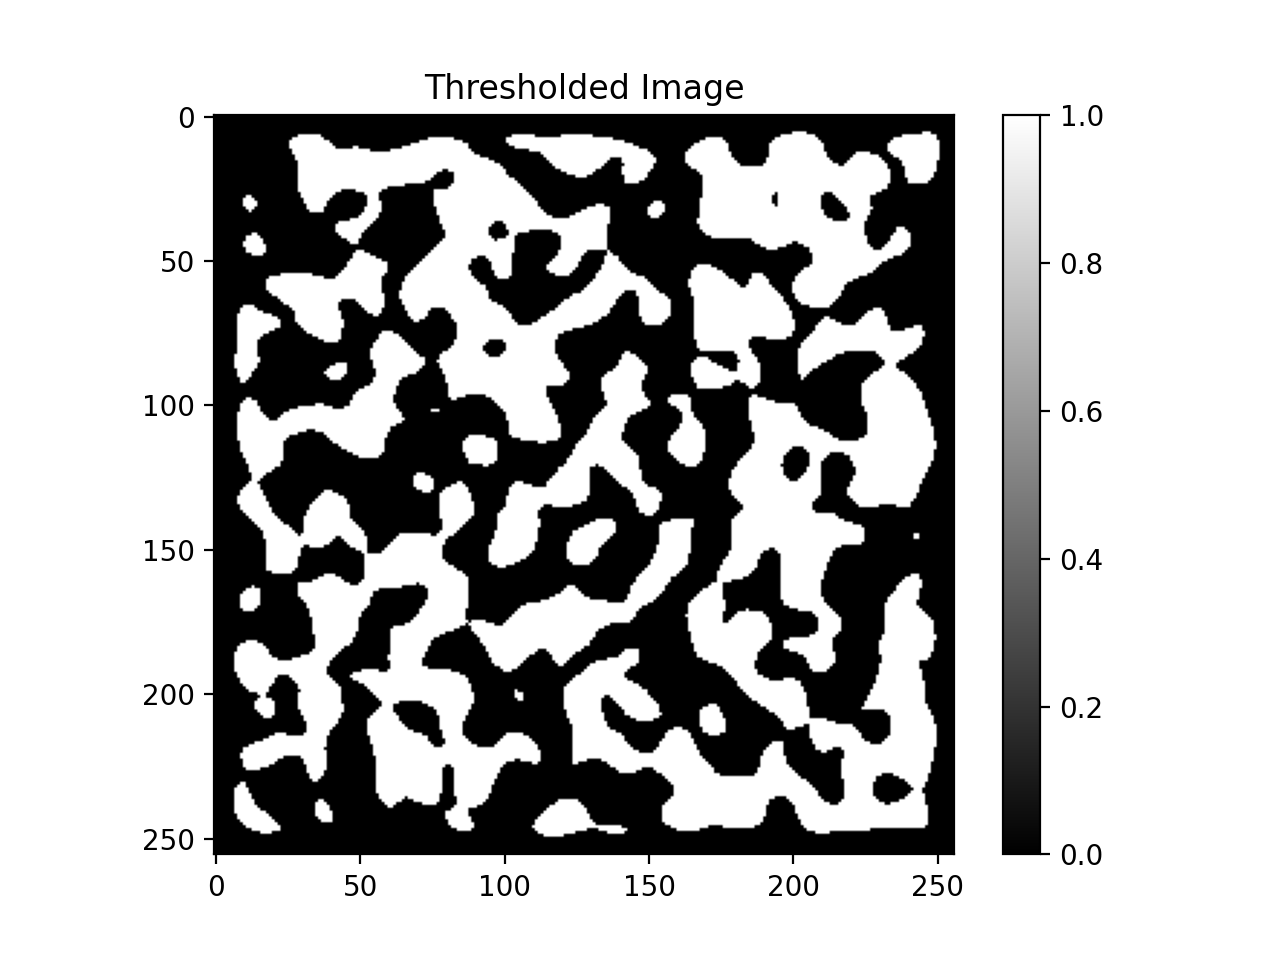

In [2]:
# Function to perform blurring
def blur_image(image, kernel):
    return scipy.signal.convolve2d(image, kernel, mode='same')

# Function to threshold the image
def threshold_image(image, threshold):
    return (image > threshold).astype(np.float32)

# Initialize parameters
image_size = (256, 256)  # size of the image
num_blur_iterations = 40  # number of times to blur the image
blur_kernel = np.array([[1/4, 1/2, 1/4]])  # blurring filter
threshold = 0.5  # threshold value

# Generate a random initial image (0s and 1s)
image = np.random.choice([0, 1], size=image_size)

# Plot initial image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Initial Image')
plt.colorbar()
plt.show()

# Perform blurring multiple times
for i in range(num_blur_iterations):
    # Blur horizontally
    image = blur_image(image, blur_kernel)
    # Blur vertically
    image = blur_image(image, blur_kernel.T)

# Plot blurred image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Blurred Image')
plt.colorbar()
plt.show()

# Apply threshold
image = threshold_image(image, threshold)

# Plot thresholded image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Thresholded Image')
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


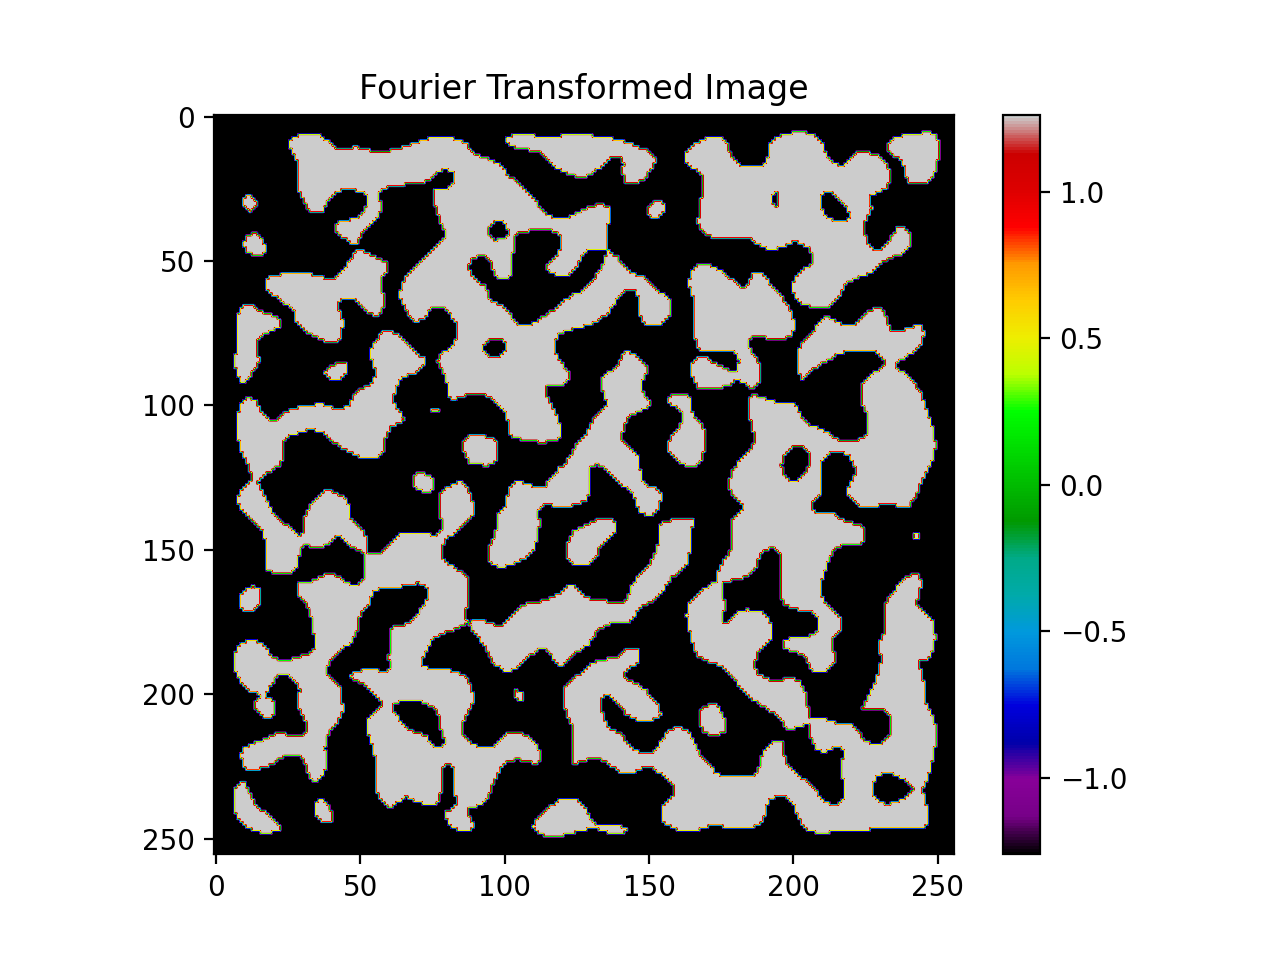

In [3]:
phasor = (image*(2*np.pi*1j)+(1-np.pi*1j))/np.abs(1+np.pi*1j)


plt.figure()
plt.imshow(np.angle(phasor), cmap='nipy_spectral')
plt.title('Fourier Transformed Image')
plt.colorbar()
plt.show()



<IPython.core.display.Javascript object>


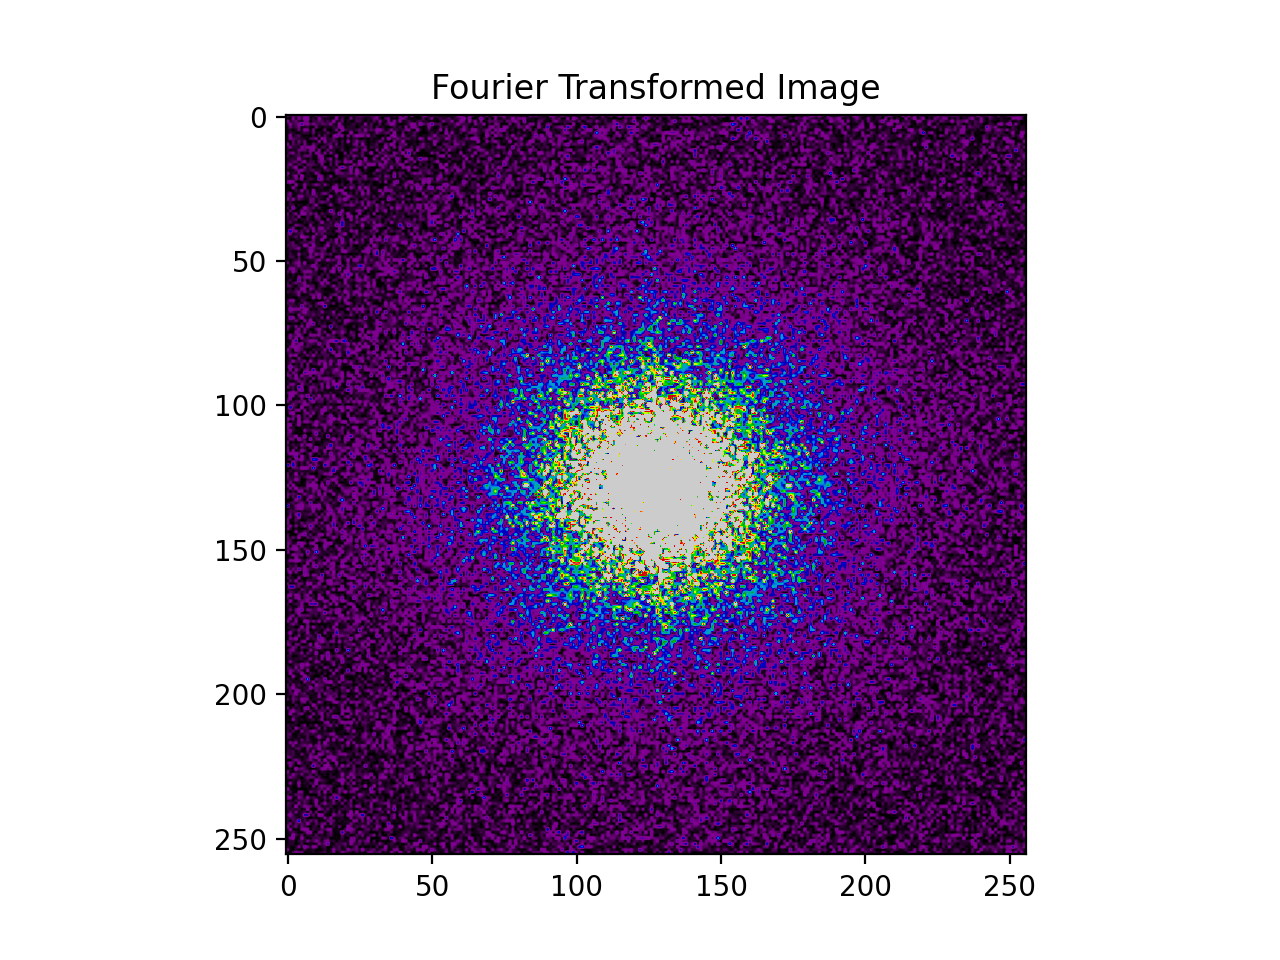

In [4]:
fft_image = np.abs(sfft.fftshift(sfft.fft2(phasor)))**2

plt.figure()
plt.imshow(fft_image, cmap='nipy_spectral',clim = (0,100000))
plt.title('Fourier Transformed Image')
plt.show()

# Particles in a Box Simultation

<IPython.core.display.Javascript object>


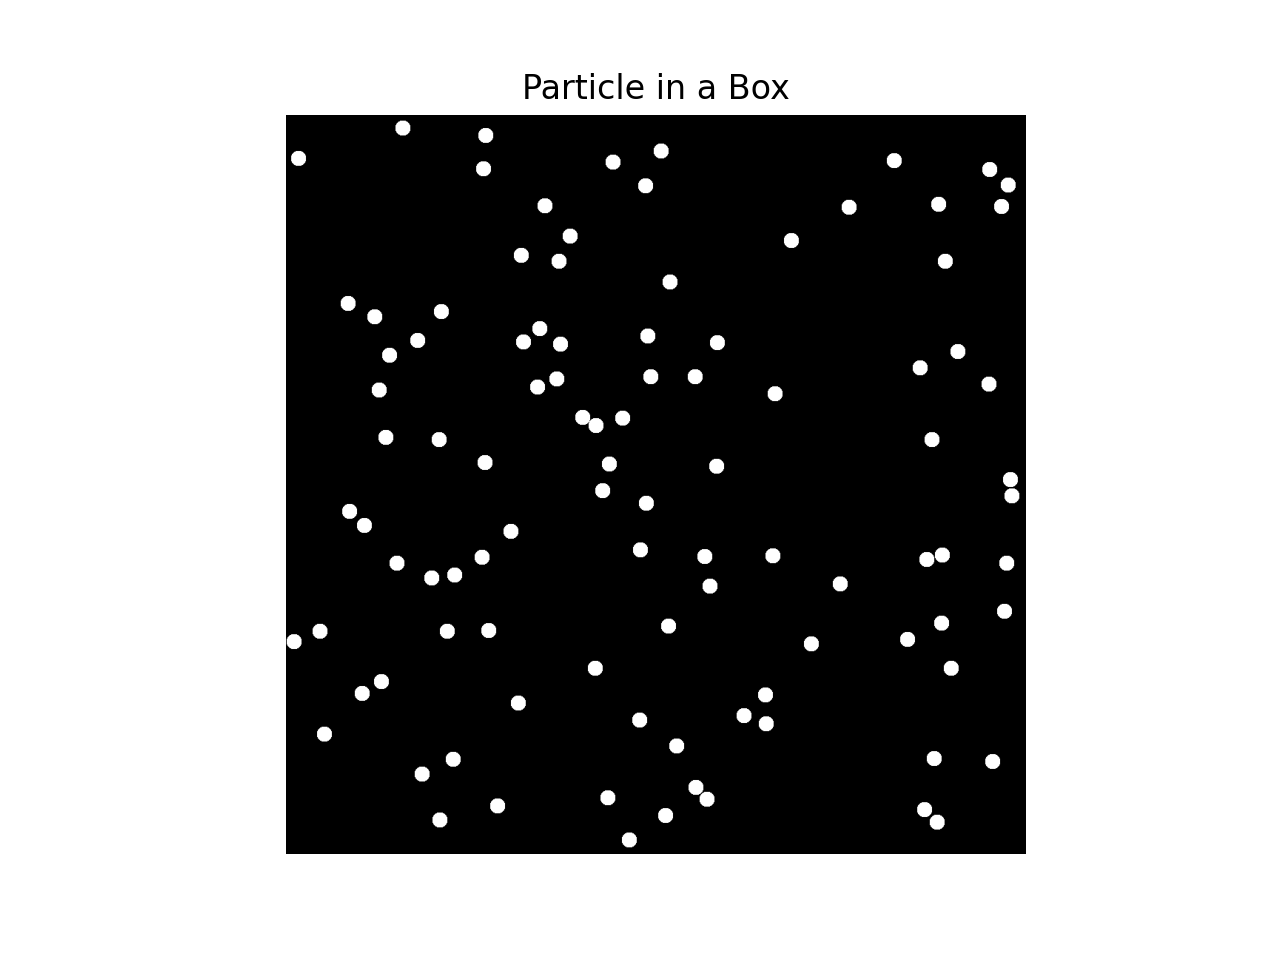

In [30]:
'''''''''
Create the Box 
'''''''''

size = 1000
numParticles = 100
radius = 10.5 #in pixels

# Create a grid of distances from the center of the circle
y, x = np.ogrid[-radius:radius+1, -radius:radius+1]

# Create particle
particle = 1*(x**2 + y**2 <= radius**2)

# Particle Dimensions
pX,pY = particle.shape

# Create box
box = np.zeros((size,size))


### Ininitialize Particle Positions ###

# Create particle positions
particleCoords = np.zeros((numParticles,len(box.shape)))

# logic so particles are not overlapped
particleCoords[0,:] += np.random.randint(low = 0, high = size, size = (len(box.shape)))

for p in range(particleCoords.shape[0]-1):
    
    # Only check against populated particles
    filled = particleCoords[0:p+1]
    #print(filled)

    # Create random new coordinate
    newCoord = np.random.randint(low = 0, high = size, size = (len(box.shape)))
    #print(newCoord[np.newaxis])
    
    # Calculate the Manhattan distance
    diff = filled - newCoord
    
    # Calculate the Euclidean Distance 
    dist = np.array(np.sqrt(diff[:,0]**2+diff[:,1]**2))
    #print(dist)
    
    
    # This while loop will execute if any particles overlap
    while any(x < 2*radius for x in dist):

        # Create random new coordinate
        newCoord = np.random.randint(low = 0, high = size, size = (len(box.shape)))

        # Calculate the Manhattan distance
        diff = filled - newCoord

        # Calculate the Euclidean Distance 
        dist = np.sqrt(diff[:,0]**2+diff[:,1]**2)
       
    # Add new particle
    particleCoords[p+1,:]+=newCoord

### Populate Box ###

for u in range(numParticles):
    
    row, col = particleCoords[u,:]
     
    row1 = int(row-pX//2)
    row2 = int(row+pX//2)
        
    col1 = int(col-pY//2)
    col2 = int(col+pY//2)
        
    # Check at Boundary and enforce periodic BCs
    BC = False

    if row1 < 0:
        row1 = (size-1)-pX
        row2 = size-1
        BC = True
    if row2 >= size:
        row1 = 0
        row2 = pX
        BC = True
    if col1 < 0:
        col1 = (size-1)-pY
        col2 = size-1
        BC = True
    if col2 >= size:
        col1 = 0
        col2 = pY
        BC = True

    # Update Particle position only if boundary condition is reached
    if BC == True:
        particleCoords[u,:] = [int((row1+row2)//2),int((col1+col2)//2)]

    # Add Particle to Box
    box[row1:row2,col1:col2] += particle 


### Plot Environment ###
    
plt.figure()
plt.imshow(box, cmap='gray')
plt.title('Particle in a Box')
plt.axis('off')
plt.show()



In [31]:
'''''''''
Evolve the Box
'''''''''

# Number of timesteps for Movie
timesteps = 1000


# Initialize Box Moive Array
boxMovie = np.zeros((timesteps,box.shape[0],box.shape[1]))
boxMovie[0,:,:] += box

# Particle Shape
pX,pY = particle.shape


for t in range(timesteps-1):
    
    # Initialize Random Displacements
    #rng = np.random.RandomState(2)
    displacement = np.random.randint(low = -3*radius, high = 3*radius, size = (numParticles,len(box.shape)))
    
    #diplacement = rng.choice([-2*radius,2*radius],size = (numParticles,len(box.shape)))
    
    
    # Update Positions
    particleCoords += displacement
    
    ### Populate Box ###
    for u in range(numParticles):
        
        
        """"""""""
        displacement = np.random.randint(low = -5*radius, high = 5*radius, size = (1,len(box.shape)))
        
        
        # Get current particle Coordinate 
        row, col = particleCoords[u,:] + displacement[0,:]
        
        row1 = int(row-pX//2)
        row2 = int(row+pX//2)

        col1 = int(col-pY//2)
        col2 = int(col+pY//2)

        while row1 < 0 or row2 >= size or col1 < 0 or col2 >= size:
            displacement = np.random.randint(low = -5*radius, high = 5*radius, size = (1,len(box.shape)))

            row, col = particleCoords[u,:] + displacement[0,:]
        
            row1 = int(row-pX//2)
            row2 = int(row+pX//2)

            col1 = int(col-pY//2)
            col2 = int(col+pY//2)
        """""""""""

        row, col = particleCoords[u,:]
        
        row1 = int(row-pX//2)
        row2 = int(row+pX//2)

        col1 = int(col-pY//2)
        col2 = int(col+pY//2)
        
        # Check at Boundary and enforce periodic BCs
        BC = False
        
        if row1 < 0:
            row1 = (size-1)-pX
            row2 = size-1
            BC = True
        if row2 >= size:
            row1 = 0
            row2 = pX
            BC = True
        if col1 < 0:
            col1 = (size-1)-pY
            col2 = size-1
            BC = True
        if col2 >= size:
            col1 = 0
            col2 = pY
            BC = True
            
        # Update Particle position only if boundary condition is reached
        if BC == True:
            particleCoords[u,:] = [int((row1+row2)//2),int((col1+col2)//2)]

        # Add Particle to Box
        boxMovie[t+1,row1:row2,col1:col2] += particle 


# Particle Movie

<IPython.core.display.Javascript object>


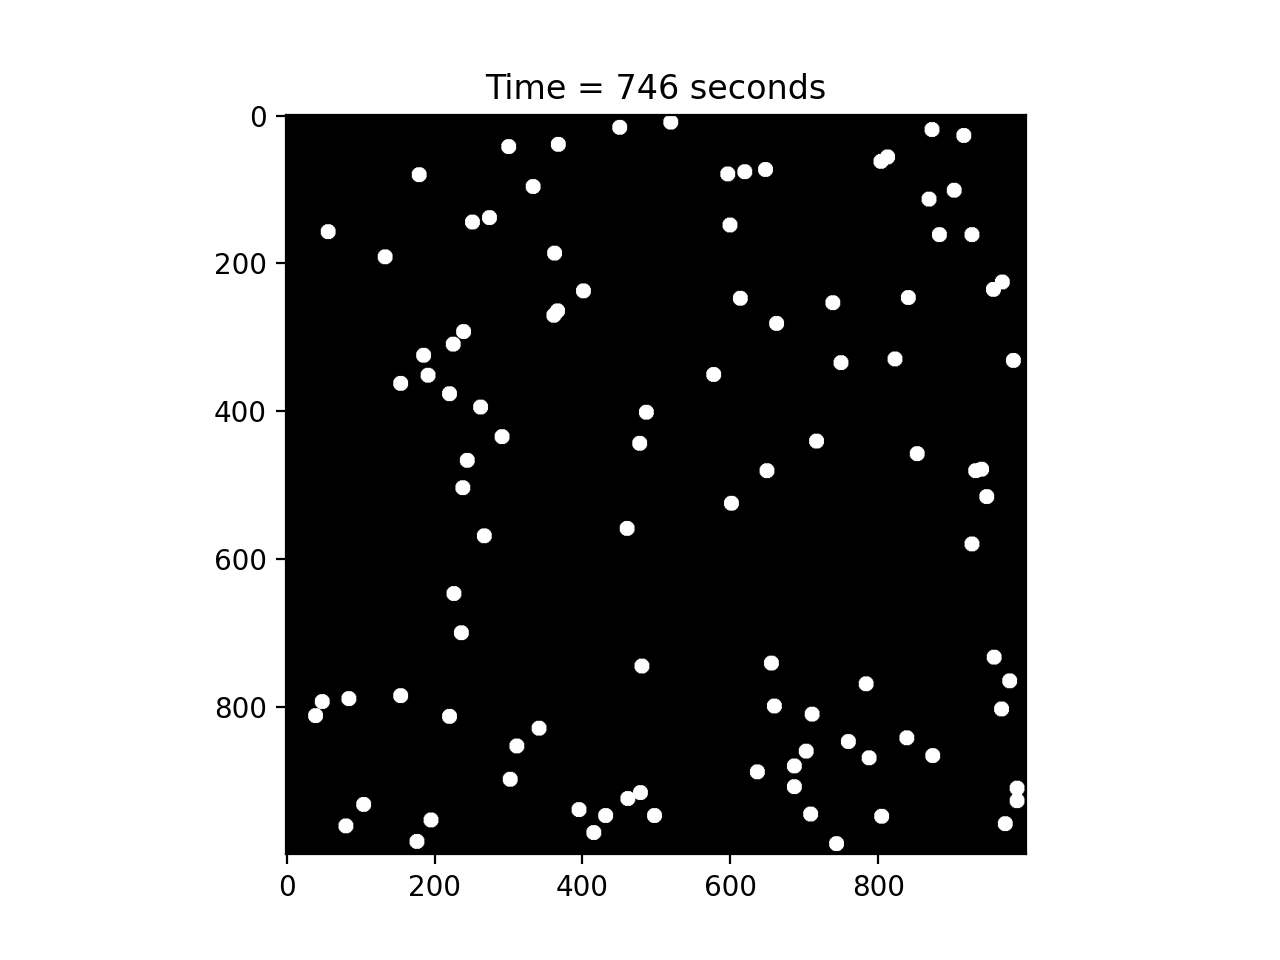

In [32]:
fig,ax = plt.subplots()

fps = 5

frames = np.arange(1,timesteps)

make_detector_movie(boxMovie,frames,1,fig,ax,'100ps_10p5r_1000f_2rstep',fps,scale='gray',clims=[0,1])    

Try padding the box by 5x5 bxes of zeros

<IPython.core.display.Javascript object>


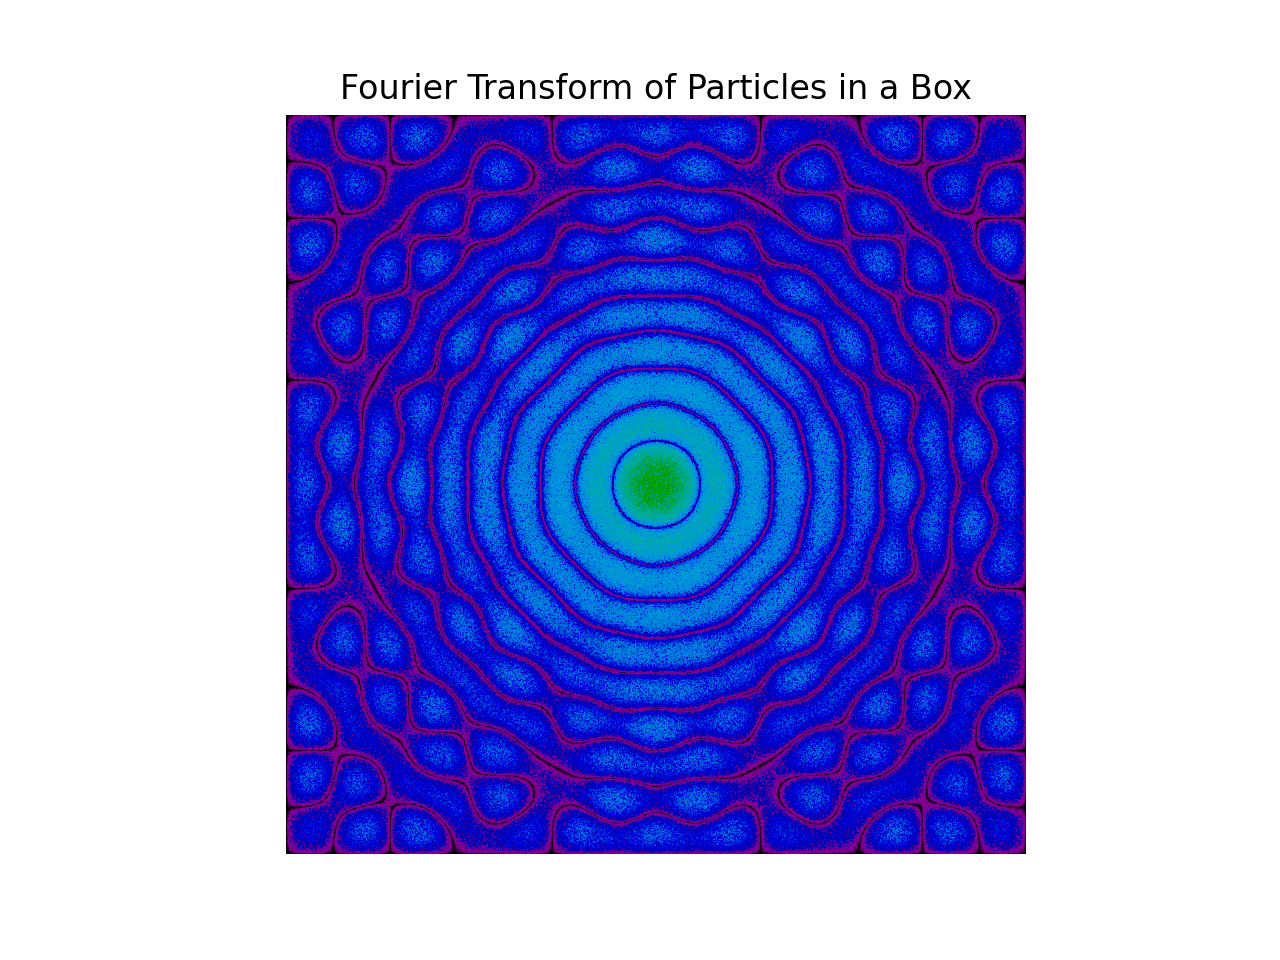

In [35]:
boxFFTmovie = np.zeros(boxMovie.shape)

for t in range(timesteps):
    boxFFTmovie[t,:,:]+= np.abs(sfft.fftshift(sfft.fft2(boxMovie[t,:,:])))**2

#box_fft = sfft.fftshift(sfft.fft2(box))




plt.figure()
plt.imshow(np.log(boxFFTmovie[0,:,:]+1), cmap='nipy_spectral',clim=(0,35))
plt.axis('off')
plt.title('Fourier Transform of Particles in a Box')
plt.show()


<IPython.core.display.Javascript object>


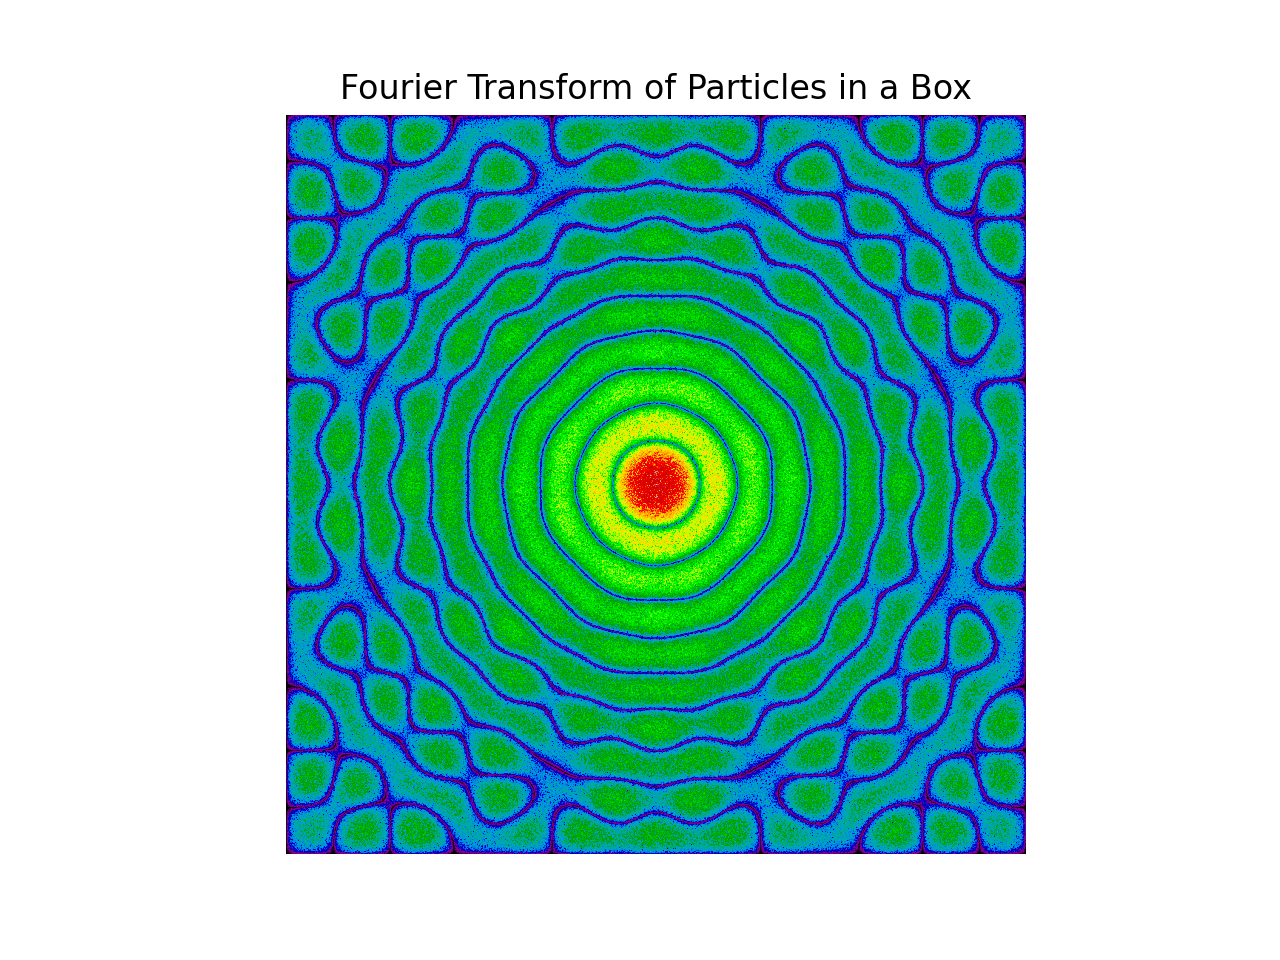

In [43]:

plt.figure()
plt.imshow(np.log(boxFFTmovie[0,:,:]+1), cmap='nipy_spectral',clim=(0,17))
plt.axis('off')
plt.title('Fourier Transform of Particles in a Box')
plt.show()

<IPython.core.display.Javascript object>


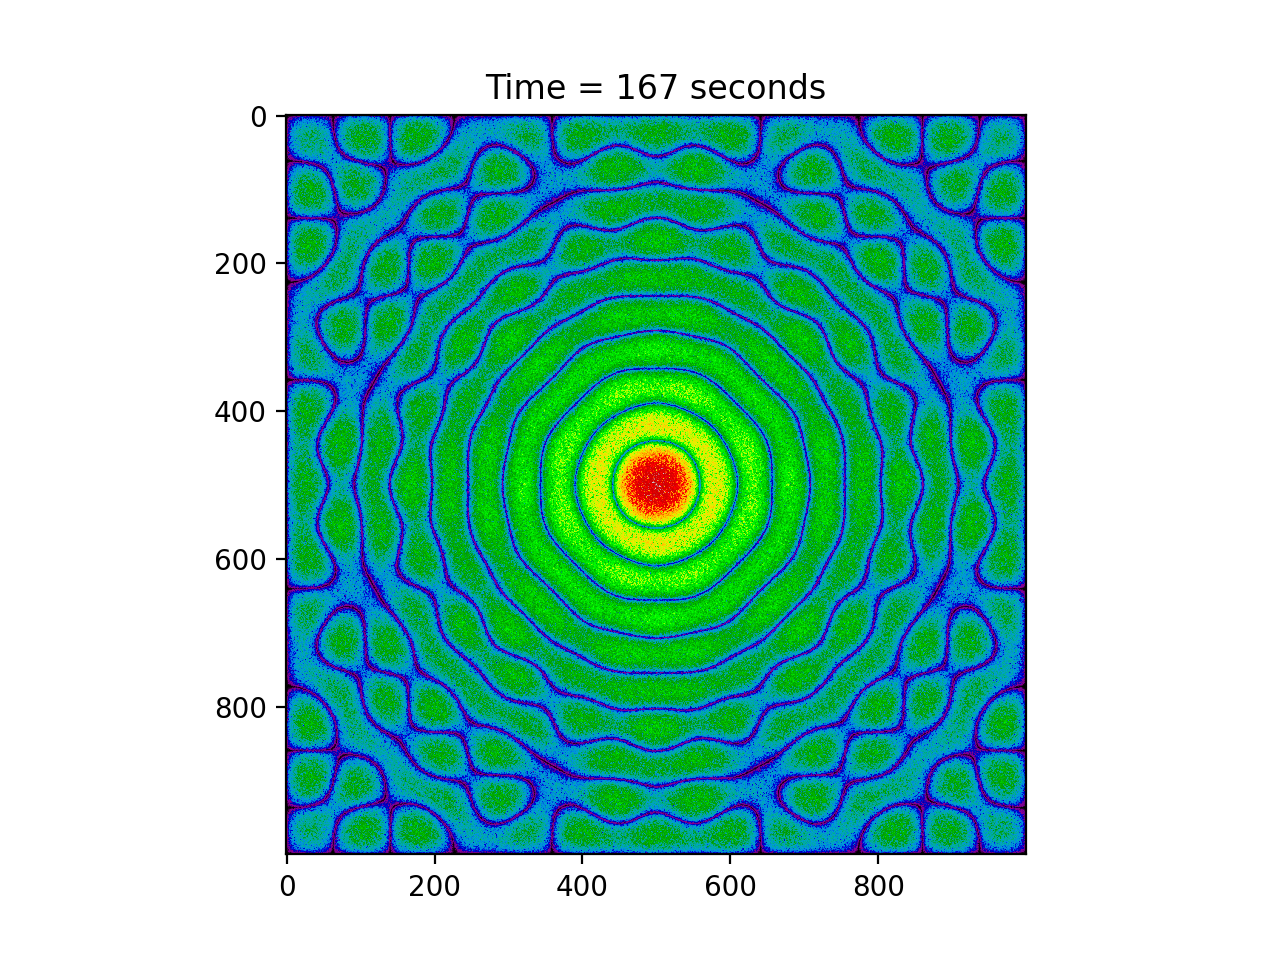

In [44]:
fig,ax = plt.subplots()


fps = 5

frames = np.arange(1,timesteps)

make_detector_movie(np.log(boxFFTmovie+1),frames,1,fig,ax,'FFT_100ps_10p5r_1000f',fps,scale='nipy_spectral',clims=[0,17])   

In [ ]:
plt.figure()

plt.plot(np.log((np.abs(box_fft)**2)[:,size//2]+1))